In [1]:
# Author: Arthur Prigent
# Email: aprigent@geomar.de

In [2]:
import xarray as xr
import numpy as np
import Artools.my_functions as Atools
from pydap.client import open_url
import matplotlib.pyplot as plt
from datetime import datetime

# Load SST data

In [3]:

sst_tmp = xr.open_dataset('https://icdc.cen.uni-hamburg.de/thredds/dodsC/reynolds_sst_all',
                      engine="pydap")


# Take Nino3.4 index

In [4]:
sst_nino34 = Atools.data_sub(sst_tmp.sst,190,240,-3,3)

sst_nino34 = sst_nino34.sel(
    time=slice(datetime(1982, 1, 1), datetime(2020, 12, 31)))

# Compute SST anomalies 

In [5]:
ssta_nino34, ssta_nino34_norm = Atools.ano_norm_t(sst_nino34.mean(dim='lon').mean(dim='lat'))

# Plot SSTa timeseries

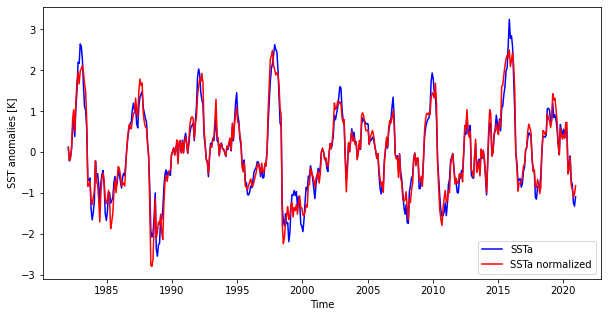

In [13]:
f,ax = plt.subplots(1,1,figsize=[10,5])


ax.plot(ssta_nino34.time,ssta_nino34,label='SSTa',color='blue')
ax.plot(ssta_nino34.time,ssta_nino34_norm,label='SSTa normalized',color='red')
ax.set_ylabel('SST anomalies [K]')
ax.set_xlabel('Time')
ax.legend()
plt.savefig('example_anomalies.png')